In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Curated Topic Modeling.csv')

In [4]:
df.head()

,Address,H1-1,Meta Description 1,Source,Title 1,Word Count,level_1,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,level_2
0,https://www.simplilearn.com/machine-learning-i...,NaN,prepping for machine learning interview? here ...,simplilearn,12 important machine learning interview questi...,NaN,machine,0,5696,61,0.2359,"ai, mean, think, facebook, update, interview, ...",prepping for machine learning interview? here ...,career
1,https://www.datasciencecentral.com/profiles/bl...,k means clustering algorithm & its application,what is k means clustering?\n\nclustering mean...,data science central,k means clustering algorithm & its application...,541.0,others,0,3259,61,0.1618,"ai, mean, think, facebook, update, interview, ...",what is k means clustering? clustering means g...,clustering
2,https://www.datasciencecentral.com/profiles/bl...,an introduction to bayesian reasoning,an introduction to bayesian reasoning\n\nyou m...,data science central,an introduction to bayesian reasoning - data s...,1881.0,others,0,3506,61,0.0889,"ai, mean, think, facebook, update, interview, ...",an introduction to bayesian reasoning you migh...,bayesian
3,https://www.datasciencecentral.com/profiles/bl...,python: implementing a k-means algorithm with ...,the below is an example of how sklearn in pyth...,data science central,python: implementing a k-means algorithm with ...,1191.0,others,0,1150,61,0.1285,"ai, mean, think, facebook, update, interview, ...",the below is an example of how sklearn in pyth...,clustering
4,https://www.datasciencecentral.com/profiles/bl...,numeric measures for association rules,"in today's post, we dive into understanding as...",data science central,numeric measures for association rules - data ...,1419.0,others,0,3791,66,0.0820,"algorithm, involve, neural_network, introducti...","in todays post, we dive into understanding ass...",math


In [5]:
import nltk

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [7]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [8]:
#spacy for lemmatization
import spacy

In [9]:
#plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [11]:
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','also','test','datum','blog','mastery','articles','science','central','complete','methods','method','comprehensive','learning','tutorial','guide','article','complete','learn','also','code','practical','simplilearn','python','machine','deep','vidhya'])

In [14]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
data = df['Text'].values.tolist()

# Convert to list
data = df['Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['prepping for machine learning interview? here are the 12 potential interview '
 'questions and answers that will help to crack the interview.']


In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [17]:
data_words = list(sent_to_words(data))

In [18]:
data_words[:1]

[['prepping',
  'for',
  'machine',
  'learning',
  'interview',
  'here',
  'are',
  'the',
  'potential',
  'interview',
  'questions',
  'and',
  'answers',
  'that',
  'will',
  'help',
  'to',
  'crack',
  'the',
  'interview']]

In [19]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)

In [20]:
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [21]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [22]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [24]:
data_words_nostops

[['prepping',
  'interview',
  'potential',
  'interview',
  'questions',
  'answers',
  'help',
  'crack',
  'interview'],
 ['means',
  'clustering',
  'clustering',
  'means',
  'grouping',
  'things',
  'similar',
  'features',
  'common',
  'purpose',
  'means',
  'clustering',
  'means'],
 ['introduction',
  'bayesian',
  'reasoning',
  'might',
  'using',
  'bayesian',
  'techniques',
  'data',
  'without',
  'knowing',
  'youre',
  'could',
  'enhance'],
 ['example',
  'sklearn',
  'used',
  'develop',
  'means',
  'clustering',
  'algorithm',
  'purpose',
  'means',
  'clustering',
  'able',
  'part'],
 ['todays',
  'post',
  'dive',
  'understanding',
  'association',
  'rules',
  'market',
  'basket',
  'analysis',
  'discuss',
  'three',
  'numeric',
  'measures',
  'considered',
  'de'],
 ['neural',
  'networks',
  'require',
  'considerable',
  'time',
  'computational',
  'firepower',
  'train',
  'previously',
  'researchers',
  'believed',
  'neural',
  'networks',
  'c

In [25]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [26]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [27]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [28]:
print(data_lemmatized[:1])

[['prepp', 'interview', 'potential', 'interview', 'question', 'answer', 'help', 'crack', 'interview']]


In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [30]:
# Create Corpus
texts = data_lemmatized

In [31]:
corpus = [id2word.doc2bow(text) for text in texts]

In [32]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('answer', 1),
  ('crack', 1),
  ('help', 1),
  ('interview', 3),
  ('potential', 1),
  ('prepp', 1),
  ('question', 1)],
 [('cluster', 2),
  ('clustering', 1),
  ('common', 1),
  ('feature', 1),
  ('group', 1),
  ('mean', 4),
  ('purpose', 1),
  ('similar', 1),
  ('thing', 1)]]

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"year" + 0.023*"particularly" + 0.020*"new" + 0.019*"testing" + '
  '0.018*"base" + 0.018*"follow" + 0.017*"task" + 0.016*"component" + '
  '0.015*"last" + 0.015*"post"'),
 (1,
  '0.045*"start" + 0.039*"web" + 0.022*"open_source" + 0.020*"ask" + '
  '0.020*"linkedin" + 0.020*"decision_tree" + 0.019*"help" + 0.019*"ml" + '
  '0.018*"class" + 0.018*"visualize"'),
 (2,
  '0.080*"introduction" + 0.050*"model" + 0.035*"write" + 0.027*"gentle" + '
  '0.025*"linear" + 0.024*"implement" + 0.024*"error" + 0.023*"large" + '
  '0.022*"residual" + 0.020*"adam"'),
 (3,
  '0.070*"use" + 0.067*"datum" + 0.040*"algorithm" + 0.037*"data" + '
  '0.023*"work" + 0.022*"post" + 0.022*"classification" + 0.020*"tensorflow" + '
  '0.020*"explain" + 0.016*"world"'),
 (4,
  '0.117*"regression" + 0.053*"understand" + 0.038*"scratch" + 0.024*"handle" '
  '+ 0.022*"question" + 0.021*"scientist" + 0.017*"become" + '
  '0.016*"case_study" + 0.016*"boost" + 0.015*"gradient"'),
 (5,
  '0.062*"use" + 0.05

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.622803096962387

Coherence Score:  0.5482140016903182


In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.241645 -0.095861       1        1  16.244514
7      0.180832 -0.280190       2        1  13.743069
2      0.126172  0.008725       3        1  10.681095
8      0.143672  0.001809       4        1  10.445386
0      0.043471  0.158458       5        1   9.709444
6     -0.187708 -0.080632       6        1   9.697666
4      0.018690  0.095118       7        1   7.833199
9      0.008315  0.112714       8        1   7.656472
5     -0.107429 -0.001264       9        1   7.340526
1      0.015631  0.081123      10        1   6.648633, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
51    Default  180.000000        network  180.000000  30.0000  30.0000
19    Default  186.000000          datum  186.000000  29.0000  29.0000
52    Default  139.000000         neural  139.000000  28.0000  28.0000
104   Default  107.000000         series  107.000000  27.0000  27.0000
56    Default  101.000000           time  101.000000  26.0000  26.0000
274   Default   79.000000     regression   79.000000  25.0000  25.0000
21    Default   74.000000   introduction   74.000000  24.0000  24.0000
26    Default  178.000000            use  178.000000  23.0000  23.0000
72    Default  141.000000          model  141.000000  22.0000  22.0000
235   Default   43.000000          image   43.000000  21.0000  21.0000
307   Default   46.000000    forecasting   46.000000  20.0000  20.0000
452   Default   52.000000           kera   52.000000  19.0000  19.0000
187   Default   36.000000     understand   36.000000  18.0000  18.0000
447   Default   51.000000           data   51.000000  17.0000  17.0000
262   Default   33.000000        library   33.000000  16.0000  16.0000
704   Default   35.000000           year   35.000000  15.0000  15.0000
28    Default   64.000000      algorithm   64.000000  14.0000  14.0000
240   Default   30.000000  visualization   30.000000  13.0000  13.0000
29    Default   40.000000        develop   40.000000  12.0000  12.0000
85    Default   26.000000          start   26.000000  11.0000  11.0000
395   Default   27.000000       forecast   27.000000  10.0000  10.0000
149   Default   39.000000          write   39.000000   9.0000   9.0000
461   Default   26.000000        scratch   26.000000   8.0000   8.0000
213   Default   23.000000            web   23.000000   7.0000   7.0000
250   Default   23.000000    recognition   23.000000   6.0000   6.0000
87    Default   23.000000        dataset   23.000000   5.0000   5.0000
22    Default   32.000000           know   32.000000   4.0000   4.0000
1599  Default   30.000000     generative   30.000000   3.0000   3.0000
380   Default   25.000000         gentle   25.000000   2.0000   2.0000
385   Default   25.000000          build   25.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
2     Topic10   10.782827           help   11.473846   2.6486  -3.9672
113   Topic10   10.720602             ml   11.411477   2.6483  -3.9730
494   Topic10   10.435995          class   11.126844   2.6467  -3.9999
423   Topic10   10.326624      visualize   11.017536   2.6460  -4.0104
893   Topic10   10.192018         author   10.882676   2.6452  -4.0235
59    Topic10    9.733353            com   10.425014   2.6421  -4.0696
144   Topic10    8.975423       notebook    9.667558   2.6365  -4.1507
429   Topic10    8.709286        xgboost    9.399916   2.6344  -4.1808
229   Topic10    8.325318           best    9.016187   2.6310  -4.2258
315   Topic10    8.282699       ensemble    8.973369   2.6307  -4.2310
2105  Topic10    8.236805            opt    8.927839   2.6302  -4.2365
2106  Topic10    8.236805          probl    8.927839   2.6302  -4.2365
2107  Topic10    8.236805       tempting    8.927839   2.6302  -4.2365
1172  Topic10    7.884115           tune   

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [46]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

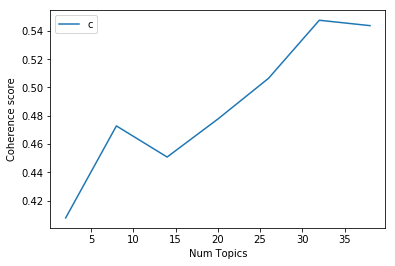

In [47]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4077
Num Topics = 8  has Coherence Value of 0.4728
Num Topics = 14  has Coherence Value of 0.4508
Num Topics = 20  has Coherence Value of 0.4776
Num Topics = 26  has Coherence Value of 0.5065
Num Topics = 32  has Coherence Value of 0.5476
Num Topics = 38  has Coherence Value of 0.5437


In [50]:
# Select the model and print the topics
optimal_model = lda_model
#model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.060*"time" + 0.060*"series" + 0.044*"forecasting" + 0.044*"model" + '
  '0.032*"kera" + 0.025*"scratch" + 0.025*"grid" + 0.025*"search" + '
  '0.025*"datum" + 0.019*"short"'),
 (1,
  '0.069*"develop" + 0.051*"model" + 0.042*"forecasting" + 0.039*"time" + '
  '0.039*"series" + 0.038*"neural" + 0.037*"network" + 0.035*"step" + '
  '0.035*"multi" + 0.023*"convolutional"'),
 (2,
  '0.069*"kera" + 0.048*"sequence" + 0.034*"neural" + 0.030*"develop" + '
  '0.030*"prediction" + 0.024*"network" + 0.021*"encoder" + 0.021*"decoder" + '
  '0.021*"library" + 0.021*"model"')]


In [828]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1],reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.7424,"develop, time, series, forecasting, model, neu...",how to develop deep learning models for univar...
1,1,0.0,0.9141,"series, time, model, forecasting, grid, search...",how to grid search hyperparameters for deep le...
2,2,5.0,0.4721,"series, time, forecasting, lstm, develop, mult...",time series prediction with deep learning in k...
3,3,0.0,0.9272,"series, time, model, forecasting, grid, search...",how to prepare a photo caption dataset for tra...
4,4,2.0,0.8626,"kera, sequence, prediction, encoder, decoder, ...",regression tutorial with the keras deep learni...
5,5,6.0,0.8999,"develop, time, series, forecasting, model, neu...",how to use word embedding layers for deep lear...
6,6,1.0,0.9454,"develop, network, neural, kera, model, convolu...",how to develop a deep learning bag-of-words mo...
7,7,1.0,0.9159,"develop, network, neural, kera, model, convolu...",multi-class classification tutorial with the k...
8,8,3.0,0.8925,"model, datum, kera, sequence, classification, ...",save and load your keras deep learning models
9,9,2.0,0.8626,"kera, sequence, prediction, encoder, decoder, ...",how to use the keras functional api for deep l...


In [829]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(15)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9501,"series, time, model, forecasting, grid, search...",how to reshape input data for long short-term ...
1,1.0,0.9454,"develop, network, neural, kera, model, convolu...",how to develop a deep learning bag-of-words mo...
2,2.0,0.9430,"kera, sequence, prediction, encoder, decoder, ...",how to develop an encoder-decoder model for se...
3,3.0,0.9352,"model, datum, kera, sequence, classification, ...",sequence classification with lstm recurrent ne...
4,4.0,0.9338,"univariate, forecasting, time, series, grid, n...",how to grid search naive methods for univariat...
5,5.0,0.9596,"series, time, forecasting, lstm, develop, mult...",how to develop lstm models for multi-step time...
6,6.0,0.9606,"develop, time, series, forecasting, model, neu...",how to develop autoregressive forecasting mode...
7,7.0,0.9114,"scratch, implement, algorithm, naive, tree, cl...",how to implement the decision tree algorithm f...


In [830]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9501,"series, time, model, forecasting, grid, search...",how to reshape input data for long short-term ...
1,1.0,0.9454,"develop, network, neural, kera, model, convolu...",how to develop a deep learning bag-of-words mo...
2,2.0,0.9430,"kera, sequence, prediction, encoder, decoder, ...",how to develop an encoder-decoder model for se...
3,3.0,0.9352,"model, datum, kera, sequence, classification, ...",sequence classification with lstm recurrent ne...
4,4.0,0.9338,"univariate, forecasting, time, series, grid, n...",how to grid search naive methods for univariat...
5,5.0,0.9596,"series, time, forecasting, lstm, develop, mult...",how to develop lstm models for multi-step time...
6,6.0,0.9606,"develop, time, series, forecasting, model, neu...",how to develop autoregressive forecasting mode...
7,7.0,0.9114,"scratch, implement, algorithm, naive, tree, cl...",how to implement the decision tree algorithm f...


In [831]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,6.0,"develop, time, series, forecasting, model, neu...",9.0,0.1500
1,0.0,"series, time, model, forecasting, grid, search...",10.0,0.1667
2,5.0,"series, time, forecasting, lstm, develop, mult...",4.0,0.0667
3,0.0,"series, time, model, forecasting, grid, search...",6.0,0.1000
4,2.0,"kera, sequence, prediction, encoder, decoder, ...",2.0,0.0333
5,6.0,"develop, time, series, forecasting, model, neu...",12.0,0.2000
6,1.0,"develop, network, neural, kera, model, convolu...",13.0,0.2167
7,1.0,"develop, network, neural, kera, model, convolu...",4.0,0.0667
8,3.0,"model, datum, kera, sequence, classification, ...",NaN,NaN
9,2.0,"kera, sequence, prediction, encoder, decoder, ...",NaN,NaN


In [832]:
df_dominant_topic.Keywords.value_counts()

develop, time, series, forecasting, model, neural, step, network, multi, kera                    13
series, time, forecasting, lstm, develop, multi, model, network, step, forecast                  12
develop, network, neural, kera, model, convolutional, sentiment, recognition, review, predict    10
series, time, model, forecasting, grid, search, datum, supervise, kera, plan                      9
model, datum, kera, sequence, classification, classifi, smartphone, recurrent, save, run          6
scratch, implement, algorithm, naive, tree, classifi, decision, baye, anaconda, setup             4
kera, sequence, prediction, encoder, decoder, model, develop, library, api, functional            4
univariate, forecasting, time, series, grid, naive, search, selection, feature, model             2
Name: Keywords, dtype: int64

In [834]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.7424,"develop, time, series, forecasting, model, neu...",how to develop deep learning models for univar...
1,1,0.0,0.9141,"series, time, model, forecasting, grid, search...",how to grid search hyperparameters for deep le...
2,2,5.0,0.4721,"series, time, forecasting, lstm, develop, mult...",time series prediction with deep learning in k...
3,3,0.0,0.9272,"series, time, model, forecasting, grid, search...",how to prepare a photo caption dataset for tra...
4,4,2.0,0.8626,"kera, sequence, prediction, encoder, decoder, ...",regression tutorial with the keras deep learni...
5,5,6.0,0.8999,"develop, time, series, forecasting, model, neu...",how to use word embedding layers for deep lear...
6,6,1.0,0.9454,"develop, network, neural, kera, model, convolu...",how to develop a deep learning bag-of-words mo...
7,7,1.0,0.9159,"develop, network, neural, kera, model, convolu...",multi-class classification tutorial with the k...
8,8,3.0,0.8925,"model, datum, kera, sequence, classification, ...",save and load your keras deep learning models
9,9,2.0,0.8626,"kera, sequence, prediction, encoder, decoder, ...",how to use the keras functional api for deep l...


In [836]:
df_1 = df_1.drop(['Unnamed: 0','Unnamed: 0.1'],1)

In [837]:
df_1.reset_index(inplace=True)

In [839]:
pd.concat([df_1,df_dominant_topic],1).to_csv('topic_cluster_1.csv')

In [840]:
df_0 = pd.read_csv('topic_cluster_0.csv')
df_1 = pd.read_csv('topic_cluster_1.csv')
df_2 = pd.read_csv('topic_cluster_2.csv')
df_3 = pd.read_csv('topic_cluster_3.csv')
df_4 = pd.read_csv('topic_cluster_4.csv')

In [850]:
df = pd.concat([df_0,df_1,df_2,df_3,df_4],0)

In [855]:
df = df.drop(['Unnamed: 0','index'],1)

In [859]:
df = df.sort_values('Keywords')

In [862]:
df = df.drop(['cluster'],1)

In [867]:
df[df.Cluster_k == 0].describe()

,Word Count,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,5654.000000,5706.0,5706.000000,5706.000000,5706.000000
mean,965.443403,0.0,2852.500000,37.311076,0.157310
std,440.486959,0.0,1647.324649,20.298564,0.065637
min,207.000000,0.0,0.000000,0.000000,0.045400
25%,604.250000,0.0,1426.250000,19.000000,0.110700
50%,900.000000,0.0,2852.500000,38.000000,0.145000
75%,1277.750000,0.0,4278.750000,56.000000,0.196300
max,2009.000000,0.0,5705.000000,69.000000,0.552900


In [870]:
df[df.Cluster_k == 1].describe()

,Word Count,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,60.000000,60.0,60.000000,60.000000,60.000000
mean,17767.116667,1.0,29.500000,3.500000,0.883057
std,5293.360991,0.0,17.464249,2.404093,0.117751
min,12528.000000,1.0,0.000000,0.000000,0.423800
25%,13859.750000,1.0,14.750000,1.000000,0.892350
50%,15652.500000,1.0,29.500000,4.000000,0.929600
75%,19645.750000,1.0,44.250000,6.000000,0.945400
max,32910.000000,1.0,59.000000,7.000000,0.960600


In [871]:
df[df.Cluster_k == 2].describe()

,Word Count,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,8.000000,8.0,8.00000,8.00000,8.000000
mean,55191.125000,2.0,3.50000,0.25000,0.969500
std,15904.630408,0.0,2.44949,0.46291,0.018176
min,38898.000000,2.0,0.00000,0.00000,0.932900
25%,41201.000000,2.0,1.75000,0.00000,0.964925
50%,51766.500000,2.0,3.50000,0.00000,0.979000
75%,66693.750000,2.0,5.25000,0.25000,0.979675
max,83127.000000,2.0,7.00000,1.00000,0.983900


In [872]:
df[df.Cluster_k == 3].describe()

,Word Count,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,331.000000,331.0,331.000000,331.000000,331.000000
mean,7247.347432,3.0,165.000000,3.649547,0.694141
std,1779.879719,0.0,95.695698,2.322060,0.161329
min,5146.000000,3.0,0.000000,0.000000,0.247000
25%,5696.500000,3.0,82.500000,2.000000,0.551500
50%,6785.000000,3.0,165.000000,4.000000,0.711600
75%,8527.000000,3.0,247.500000,5.000000,0.824700
max,12376.000000,3.0,330.000000,7.000000,0.931200


In [873]:
df[df.Cluster_k == 4].describe()

,Word Count,Cluster_k,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,1510.000000,1510.0,1510.000000,1510.000000,1510.000000
mean,3040.836424,4.0,754.500000,11.001325,0.402265
std,809.855591,0.0,436.043767,5.588376,0.127880
min,2010.000000,4.0,0.000000,0.000000,0.130400
25%,2339.000000,4.0,377.250000,6.000000,0.317700
50%,2841.500000,4.0,754.500000,12.000000,0.382900
75%,3616.750000,4.0,1131.750000,16.000000,0.477100
max,5132.000000,4.0,1509.000000,19.000000,0.794100


In [1]:
df

NameError: name 'df' is not defined